№1 Реализовать функцию gradient_descent(X, y), которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал методом градиентного спуска (Batch Gradient Descent, GD) и возвращая вектор весов w. В качестве функционала можно выбрать, например, функцию ошибок MSE + -регуляризатор. Использовать матрично-векторные операции для вычисления градиента


In [88]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def gradient_descent(X, y):
    
    #X - матрица признаков
    #y - вектор целевой переменной
    #w - вектор весов
    
    w = np.zeros(X.shape[1])
    k = X.shape[0]
    for i in range(1500):
        y1 = np.dot(X, w)
        for j in range(X.shape[1]):
            w[j] -= 0.001 * (1/k * 2 * np.sum(X[:, j] * (y1 - y)))
    return w

№2 Найти данные, на которых интересно будет решать задачу регрессии. Зависимость целового признака от нецелевых должна быть не слишком сложной, чтобы обученная линейная модель смогла показать приемлимый результат.

Ссылка на датасет https://www.kaggle.com/datasets/whenamancodes/water-pollution

Файл water_potability.csv содержит показатели качества воды.

9 физико-химических характеристик воды и 1 - оценка безопасности воды для потребления человеком. 1 - пригодна для питья, а 0 - непригодна для питья. 

№3 Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning)

In [89]:
import pandas as pd
water_info = pd.read_csv('water_potability.csv', sep=',')

water_info.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Количественные признаки:

pH -  индикатор кислотного или щелочного состояния воды. ВОЗ рекомендует максимально допустимый предел рН от 6,5 до 8,5. 

Hardness - совокупность химических и физических свойств воды, связанных с содержанием в ней растворённых солей щёлочноземельных металлов, главным образом кальция, магния и железа.

Solids - способность растворять широкий спектр неорганических и некоторых органических минералов или солей, таких как калий, кальций, натрий, бикарбонаты, хлориды, магний, сульфаты и т. д. Эти минералы придают воде нежелательный вкус и обесцвеченный цвет. Желаемый предел для TDS составляет 500 мг/л, а максимальный предел составляет 1000 мг/л.

Chloramines - образуются при добавлении аммиака к хлору для обработки питьевой воды. Уровни хлора до 4 миллиграммов на литр (мг/л или 4 частей на миллион (ppm)) считаются безопасными для питьевой воды.

Sulfate	- природные вещества, которые содержатся в минералах, почве и горных породах. Концентрация сульфатов в морской воде составляет около 2700 миллиграммов на литр (мг/л). В большинстве источников пресной воды он колеблется от 3 до 30 мг/л, хотя в некоторых географических точках встречаются гораздо более высокие концентрации (1000 мг/л).

Conductivity - фактически измеряет ионный процесс раствора, который позволяет ему передавать ток. По стандартам ВОЗ значение ЕС не должно превышать 400 мкСм/см.

Organic_carbon - мера общего количества углерода в органических соединениях в чистой воде. По данным Агентства по охране окружающей среды США < 2 мг/л в виде TOC в очищенной/питьевой воде и < 4 мг/л в исходной воде, используемой для очистки.

Trihalomethanes - химические вещества, которые можно найти в воде, обработанной хлором. Концентрация ТГМ в питьевой воде варьируется в зависимости от уровня органических веществ в воде, количества хлора, необходимого для обработки воды, и температуры очищаемой воды. Уровни ТГМ до 80 частей на миллион считаются безопасными для питьевой воды.

Turbidity - зависит от количества твердого вещества, находящегося во взвешенном состоянии. 

Целевой признак:

Potability - безопасна ли вода для потребления человеком. Пригодна для питься - 1, а 0 - непригодна для питья.

In [90]:
water_info.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Признаки pH, Sulfate, Trihalomethanes имеют пропущенные значения, особенно признак Sulfate. 

In [91]:
water_info['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

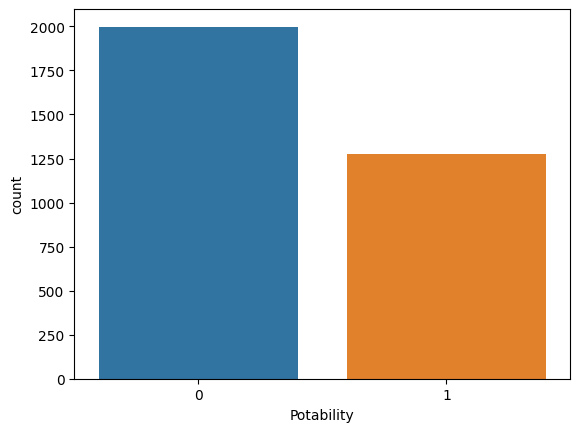

In [92]:
sns.countplot(x='Potability', data=water_info);

In [93]:
water_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [94]:
water_info.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


№4 Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии

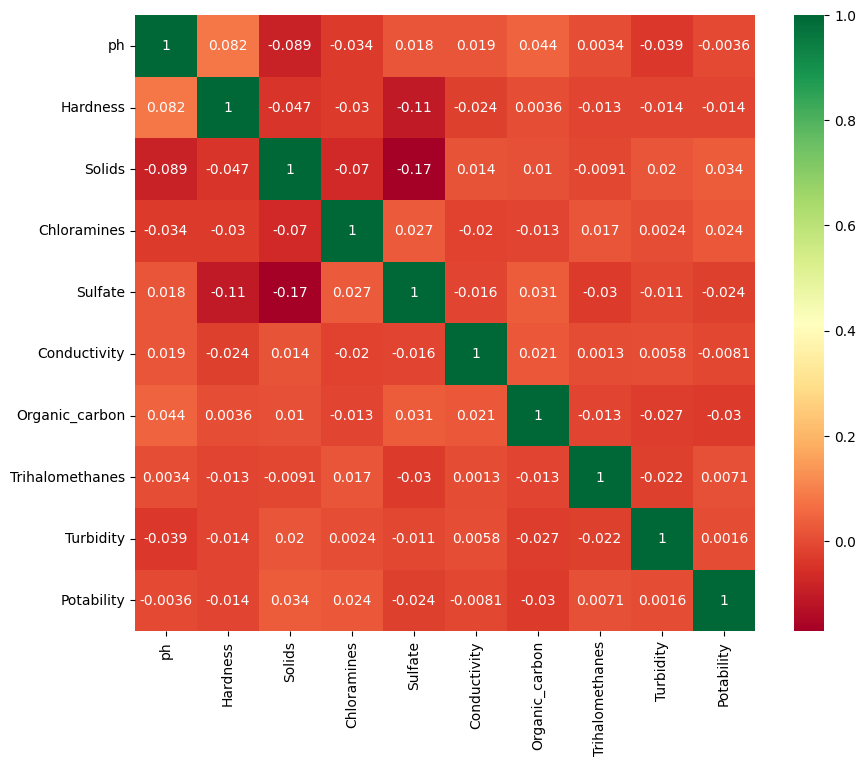

In [95]:
sns.heatmap(water_info.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

Корреляция слабая

№5 При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

Воспользуемся признаком Hardness и выделим во множестве его значений (от 47.4 до 323) категории.

In [96]:
water_info['Hardness_category'] = 0
water_info.loc[water_info['Hardness'] <= 60, 'Hardness_category'] = 0 
water_info.loc[(water_info['Hardness'] > 60) & (water_info['Hardness'] <= 100), 'Hardness_category'] = 1
water_info.loc[(water_info['Hardness'] > 100) & (water_info['Hardness'] <= 150), 'Hardness_category'] = 2
water_info.loc[(water_info['Hardness'] > 150) & (water_info['Hardness'] <= 200), 'Hardness_category'] = 3
water_info.loc[(water_info['Hardness'] > 200) & (water_info['Hardness'] <= 250), 'Hardness_category'] = 4
water_info.loc[(water_info['Hardness'] > 250) & (water_info['Hardness'] <= 300), 'Hardness_category'] = 5
water_info.loc[water_info['Hardness'] > 300, 'Hardness_category']  = 6
water_info.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Hardness_category
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,4
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0,2
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0,4
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,4
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,3


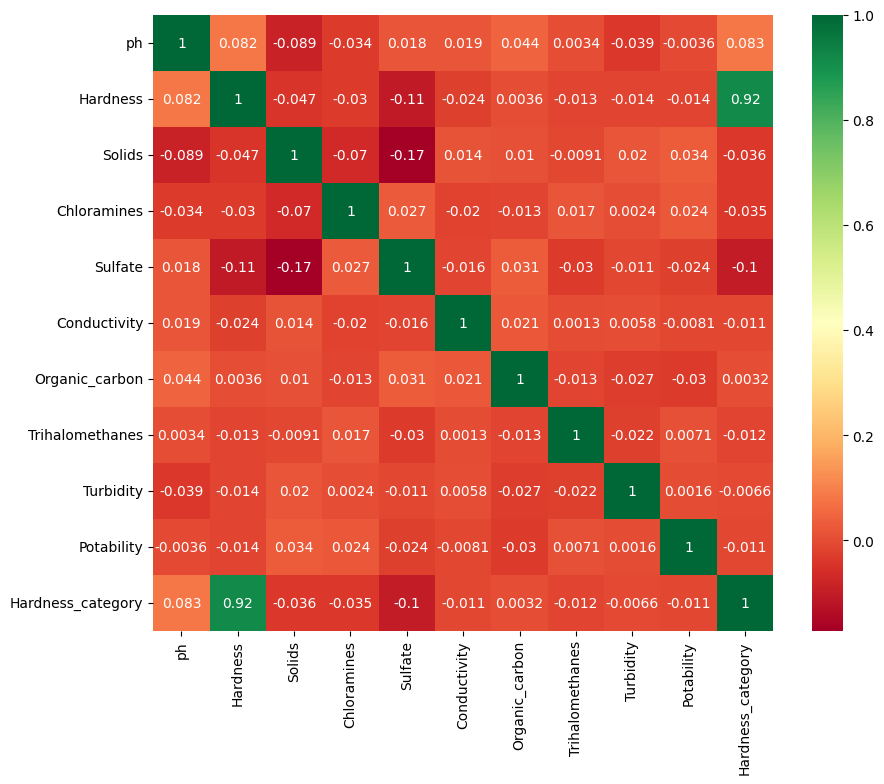

In [97]:
sns.heatmap(water_info.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

In [98]:
water_info['Hardness_category'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Hardness_category
3,1536
4,1327
2,240
5,153
1,10
6,9
0,1


Самая распространенная жесткость у категории 3, где значения от 150 до 200

№6 Случайным образом разбить данные на обучающую и тестовую выборки, используя методы существующих библиотек.

In [120]:
from sklearn.model_selection import train_test_split
%precision %.4f

import warnings
warnings.filterwarnings('ignore')

y = water_info["Potability"]
X = water_info.drop(columns=["Potability"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

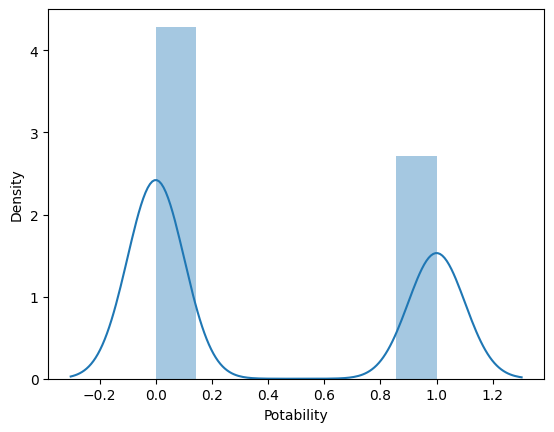

In [121]:
sns.distplot(y_train);

№7 При обучении моделей использовать масштабирование данных

Масштабируем признаки перед обучением модели. Для этого воспользуемся трансформером StandardScaler.

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)
